<a href="https://colab.research.google.com/github/kamalupadhaya/machine_learning/blob/main/Applied_Machine_Learning_Final_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy scikit-learn statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import asarray
from sklearn import svm
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,learning_curve,train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, roc_curve,roc_auc_score,classification_report


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the dataset
fname = '/content/drive/Shareddrives/BINF610-Project/Heart.csv'
data= pd.read_csv(fname)

data

,PatientID,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
data['AHD'].value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PatientID   303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [ ]:
data=data.drop(data.columns[0],axis=1)

In [ ]:
#--see if there are any NaNs
data.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [ ]:
#--imputing with mode, most repeated vlaues in the dataset
data = data.fillna(data.mode().iloc[0])
data.isna().sum().sum()

0

In [ ]:
#--Replacing Yes with 1 and No with 0
data['AHD'] = data['AHD'].replace({'Yes': 1, 'No':0})
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,1
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,1
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,1
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,1


In [ ]:
# distribution of target variable
# 1 --> Heart disease present
# 0 --> No heart disease present

data.AHD.value_counts()

0    164
1    139
Name: AHD, dtype: int64

In [ ]:
#--group by the data based upon the target variable

data.groupby('AHD').sum()

<ipython-input-11-fa30ba4f29f5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('AHD').sum()


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
AHD,,,,,,,,,,,
0,8624,92,21197,39793,23,137,25974,23,96.2,231,44.0
1,7871,114,18705,34955,22,163,19357,76,218.8,254,157.0


In [ ]:
X = data.drop('AHD', axis = 1)
y = data['AHD']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
#--apply oversampling to balance the dataset
oversampler = RandomOverSampler(random_state = 42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
#--create a new balanced DataFrame
balanced_data = pd.concat([X_resampled, y_resampled], axis =1)
balanced_data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,65,1,typical,138,282,1,2,174,0,1.4,2,1.0,normal,1
324,60,1,asymptomatic,130,253,0,0,144,1,1.4,1,1.0,reversable,1
325,62,0,asymptomatic,138,294,1,0,106,0,1.9,2,3.0,normal,1
326,61,0,asymptomatic,145,307,0,2,146,1,1.0,2,0.0,reversable,1


In [ ]:
#--separate predictors and outcome
X = balanced_data.drop('AHD', axis = 1)
y = balanced_data['AHD']

In [ ]:
#--see the general statistics
balanced_data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,54.378049,0.685976,132.085366,248.536585,0.155488,1.024390,148.716463,0.353659,1.070427,1.609756,0.692073,0.500000
std,9.039012,0.464835,18.028656,51.669426,0.362923,0.992025,22.788794,0.478835,1.167767,0.615917,0.951258,0.500764
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,244.500000,0.000000,2.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.500000
75%,61.000000,1.000000,140.000000,282.000000,0.000000,2.000000,165.000000,1.000000,1.800000,2.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [ ]:
balanced_data.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD            int64
dtype: object

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'RestBP'}>,
        <Axes: title={'center': 'Chol'}>,
        <Axes: title={'center': 'Fbs'}>],
       [<Axes: title={'center': 'RestECG'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'ExAng'}>,
        <Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'Slope'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'AHD'}>,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

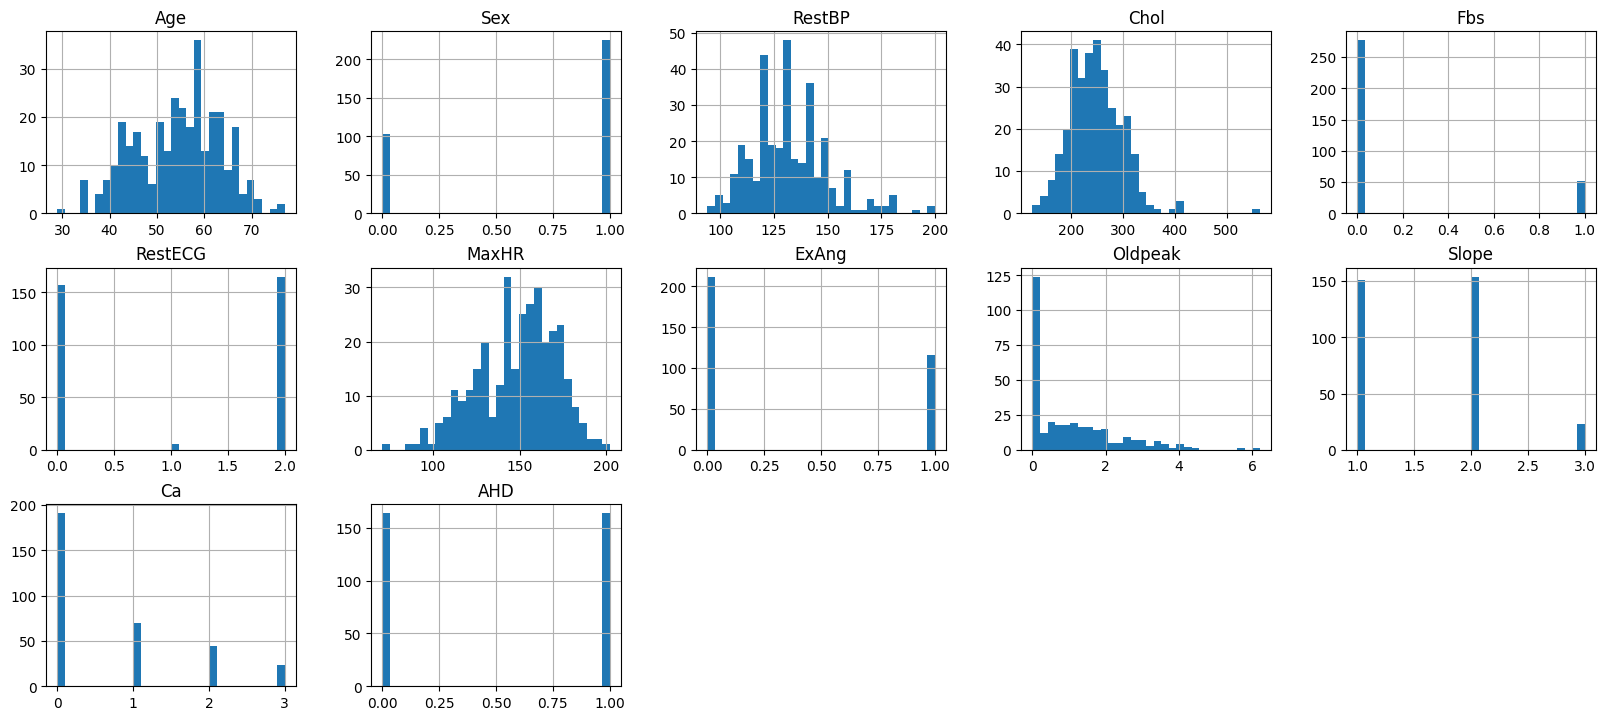

In [ ]:
balanced_data.hist(bins=30,figsize=(20,30),layout=(10,5))

In [ ]:
balanced_data['Sex'].value_counts()

1    225
0    103
Name: Sex, dtype: int64

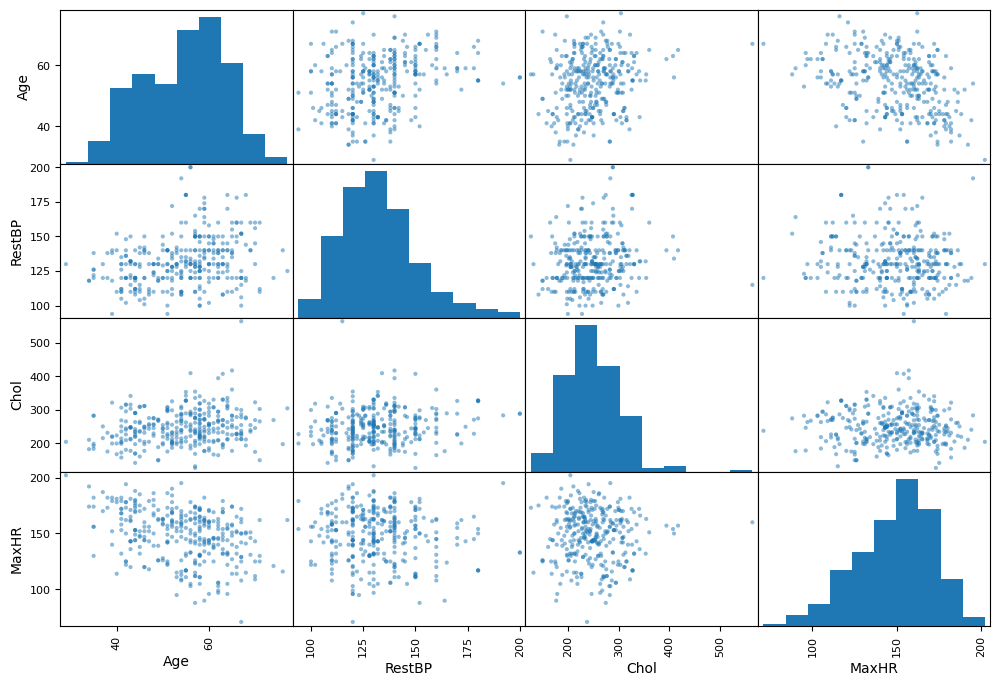

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['Age', 'ChestPain', 'RestBP', 'Chol', 'MaxHR', 'Thal' ]

scatter_matrix(balanced_data[attributes], figsize=(12,8))
plt.show()

In [ ]:
#--looking for correlations
corr_matrix = balanced_data.corr()

#--looking the correlation between AHD (Angiographic Heart Disease) with other attributing factors
corr_matrix['AHD'].sort_values(ascending=False)

<ipython-input-21-886a5b83b692>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = balanced_data.corr()


AHD        1.000000
ExAng      0.446376
Ca         0.446176
Oldpeak    0.414964
Slope      0.327198
Sex        0.269323
Age        0.198630
RestECG    0.190835
RestBP     0.157510
Chol       0.114291
Fbs        0.042067
MaxHR     -0.424610
Name: AHD, dtype: float64

In [ ]:
#--split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#--encoding the balanced data

ohe = OneHotEncoder()
ohe.fit(balanced_data[['ChestPain', 'Thal']])

OneHotEncoder()

<ipython-input-25-5130b26d800e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=balanced_data.corr()


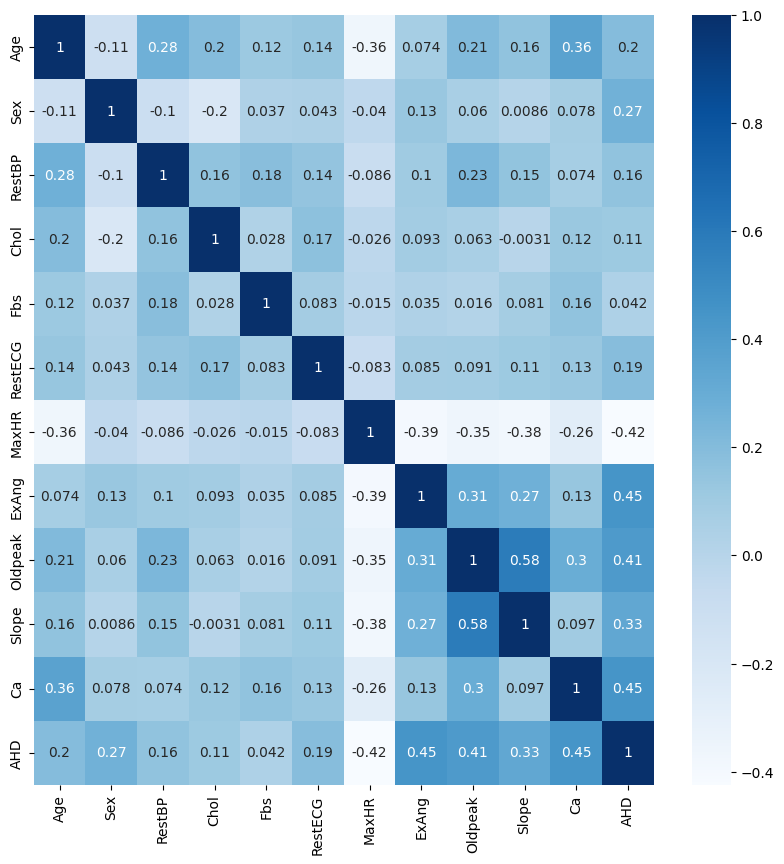

In [ ]:
#Visualizing Features
import seaborn as sns
corrmat=balanced_data.corr()
top_corr=corrmat.index
plt.figure(figsize=(10,10))
hm=sns.heatmap(balanced_data[top_corr].corr(),annot=True,cmap='Blues')

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
column_transform = ColumnTransformer([('onehotencoder', OneHotEncoder(), ['ChestPain', 'Thal']),('passthrough', 'passthrough', ['Age', 'Sex', 'RestBP', 'Chol', 'Fbs','RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca'])])

In [ ]:
##Logistic Regression 
lr = LogisticRegression()
pipe = make_pipeline(column_transform, lr)
lr_fit=pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


# Ensure the column names match those of X_train
transformed_feature_names = pipe.named_steps['columntransformer'].get_feature_names_out()
X_train_transformed = pd.DataFrame(pipe.named_steps['columntransformer'].transform(X_train), columns=transformed_feature_names)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   0          1  accuracy  macro avg  weighted avg
precision   0.735294   0.843750  0.787879   0.789522      0.794452
recall      0.833333   0.750000  0.787879   0.791667      0.787879
f1-score    0.781250   0.794118  0.787879   0.787684      0.788269
support    30.000000  36.000000  0.787879  66.000000     66.000000


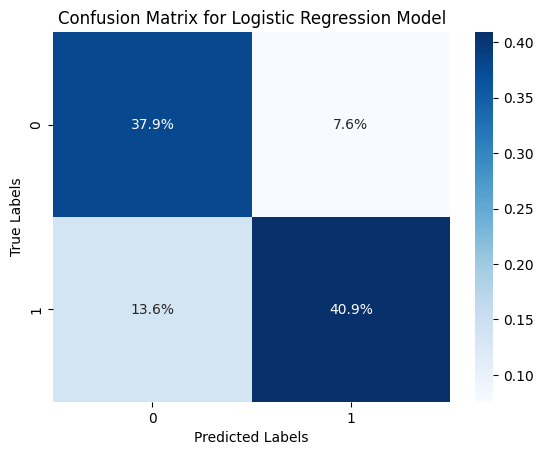

Cross-validation scores: [0.86792453 0.8490566  0.80769231 0.90384615 0.84615385]
Mean Cross-validation score: 0.8549346879535559


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
lr_accuracy=accuracy_score(y_test,y_pred)
lr_classreport=classification_report(y_test,y_pred,output_dict=True)

print(pd.DataFrame(lr_classreport))
lr_cm=confusion_matrix(y_test,y_pred)
sns.heatmap(lr_cm/(np.sum(lr_cm)),annot=True,fmt='.1%',cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#Cross-Validation Step
lr_cvs=cross_val_score(pipe,X_train,y_train,cv=5)
avg_lr_cvs=lr_cvs.mean()
print("Cross-validation scores:",lr_cvs)
print("Mean Cross-validation score:",avg_lr_cvs)

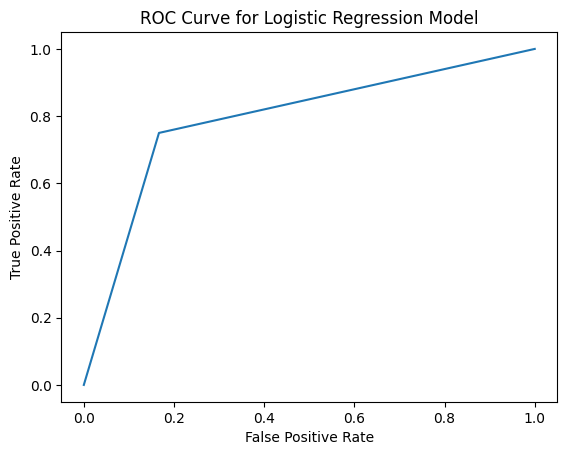

The AUC Score for Logistic Regression Model: 0.7916666666666667


In [ ]:
lr_fpr, lr_tpr, lr_thresholds=roc_curve(y_test,y_pred)
plt.plot(lr_fpr,lr_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.show()
lr_auc=roc_auc_score(y_test,y_pred)
print("The AUC Score for Logistic Regression Model:",lr_auc)

#*Random Forest Classifier*

In [ ]:
#--features and target for the baclanced data
features = balanced_data.drop('AHD', axis = 1)

#--one hot encode categorical features
features = pd.get_dummies(features, columns=['ChestPain', 'Thal'])

#--set target variable for the balanced dataset
target = balanced_data['AHD']

In [ ]:
#--split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#--fitting a random forest classifier with default parameter and see the accuracy of the model
rfc = RandomForestClassifier()

#--fit data to the classifier
rfc.fit(X_train, y_train)

#--predict on testing data
rfc_y_pred = rfc.predict(X_test)

#--checking accuracy
accuracy = accuracy_score(y_test, rfc_y_pred)

print(f'Accuracy of Random Forest Classifier with default hyperparameter: {accuracy:.4f}')

Accuracy of Random Forest Classifier with default hyperparameter: 0.7879


In [ ]:
from sklearn.model_selection import GridSearchCV
#--tuning the min_samples_leaf hyperparameter using Grid Search with Cross Validation 
#--define a grid of hyperparameters to search over
param_grid = {'min_samples_leaf': [1, 5, 10, 20, 40, 50]}

#--creating a GridSearchCV object
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 5)

#--Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

#--print the best hyperparameters found
print('Best hyperparameters:', grid_search.best_params_)

#--Evaluate the model accuracy on the testing set 
print('Accuracy of best model:', grid_search.score(X_test, y_test))

Best hyperparameters: {'min_samples_leaf': 1}
Accuracy of best model: 0.7878787878787878


                   0          1  accuracy  macro avg  weighted avg
precision   0.750000   0.823529  0.787879   0.786765      0.790107
recall      0.800000   0.777778  0.787879   0.788889      0.787879
f1-score    0.774194   0.800000  0.787879   0.787097      0.788270
support    30.000000  36.000000  0.787879  66.000000     66.000000


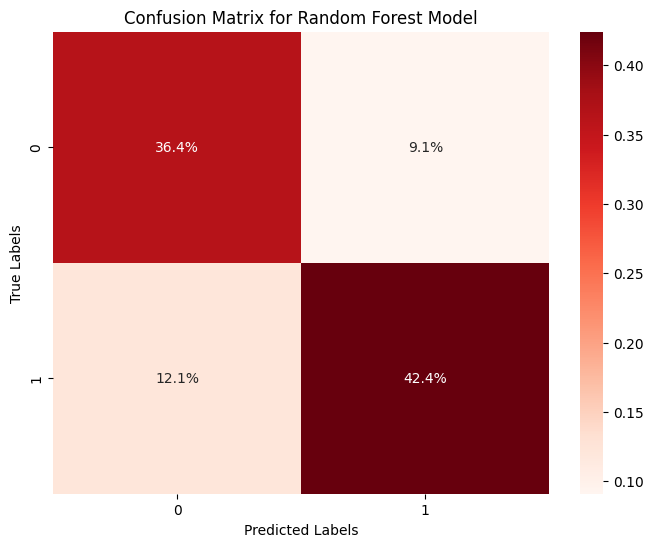

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
rfc_accuracy=accuracy_score(y_test,y_pred)
rfc_classreport=classification_report(y_test,rfc_y_pred,output_dict=True)

print(pd.DataFrame(rfc_classreport))
rfc_cm=confusion_matrix(y_test,rfc_y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rfc_cm / np.sum(rfc_cm), annot=True, fmt='.1%', cmap='Reds')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#*SVM Classifier*

In [ ]:
param_grid_svm = {'C': [0.001,0.01,0.1, 1, 10,100]} 

In [ ]:
svm_poly=svm.SVC(kernel='poly')

In [ ]:
grid_search_svm1 = GridSearchCV(svm_poly, param_grid_svm, cv=5)
grid_search_svm1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
best_svm=grid_search_svm1.best_estimator_
print(best_svm)

SVC(C=100, kernel='poly')


In [ ]:
svm_model1_pred=best_svm.predict(X_test)

In [ ]:
cv_svm_1=cross_val_score(svm_poly,X_train,y_train,cv=10)
print("Cross-validation scores:",cv_svm_1)
print("The Average Cross Val Score:{:.2f}".format(cv_svm_1.mean()))

Cross-validation scores: [0.7037037  0.55555556 0.65384615 0.76923077 0.76923077 0.69230769
 0.73076923 0.73076923 0.65384615 0.57692308]
The Average Cross Val Score:0.68


In [ ]:
accuracy_svm1=accuracy_score(y_test,svm_model1_pred)
print(accuracy_svm1)

0.7424242424242424


In [ ]:
svm_rbf=svm.SVC(kernel='rbf')

In [ ]:
grid_search_svm2 = GridSearchCV(svm_rbf, param_grid_svm, cv=5)
grid_search_svm2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
best_svm2=grid_search_svm2.best_estimator_
print(best_svm2)

SVC(C=100)


In [ ]:
svm_model2_pred=best_svm2.predict(X_test)

In [ ]:
cv_svm_2=cross_val_score(svm_rbf,X_train,y_train,cv=10)
print("Cross-validation scores:",cv_svm_2)
print("The Average Cross Val Score:{:.2f}".format(cv_svm_2.mean()))

Cross-validation scores: [0.59259259 0.40740741 0.65384615 0.84615385 0.65384615 0.61538462
 0.69230769 0.65384615 0.76923077 0.42307692]
The Average Cross Val Score:0.63


In [ ]:
accuracy_svm2=accuracy_score(y_test,svm_model2_pred)
print(accuracy_svm2)

0.6818181818181818


                   0          1  accuracy  macro avg  weighted avg
precision   0.696970   0.787879  0.742424   0.742424      0.746556
recall      0.766667   0.722222  0.742424   0.744444      0.742424
f1-score    0.730159   0.753623  0.742424   0.741891      0.742958
support    30.000000  36.000000  0.742424  66.000000     66.000000


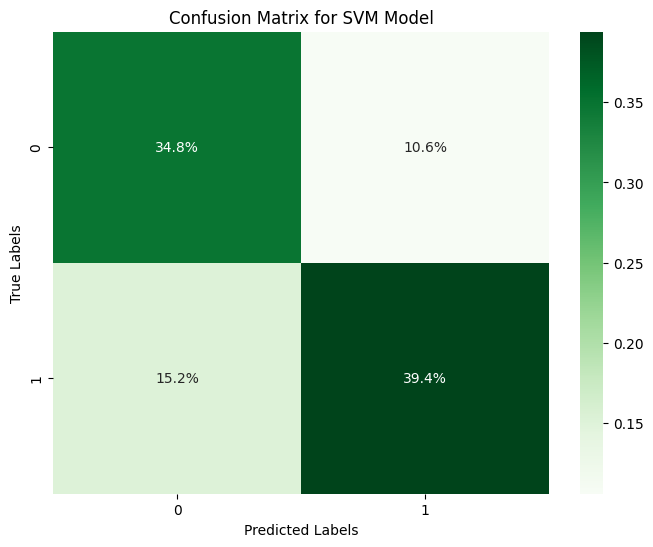

In [ ]:
svm_accuracy=accuracy_score(y_test,svm_model1_pred)
svm_classreport=classification_report(y_test,svm_model1_pred,output_dict=True)

print(pd.DataFrame(svm_classreport))
svm_cm=confusion_matrix(y_test,svm_model1_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm / np.sum(svm_cm), annot=True, fmt='.1%', cmap='Greens')
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#*K-Means Clustering*

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_data = pd.get_dummies(balanced_data, columns=['ChestPain', 'Thal']) #--One-hot encode categorical features

k_range = range(1, 11)

inertias = []
silhouette_scores = []

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(cluster_data)
  inertias.append(kmeans.inertia_)
  if k > 1:
    silhouette_scores.append(silhouette_score(cluster_data, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

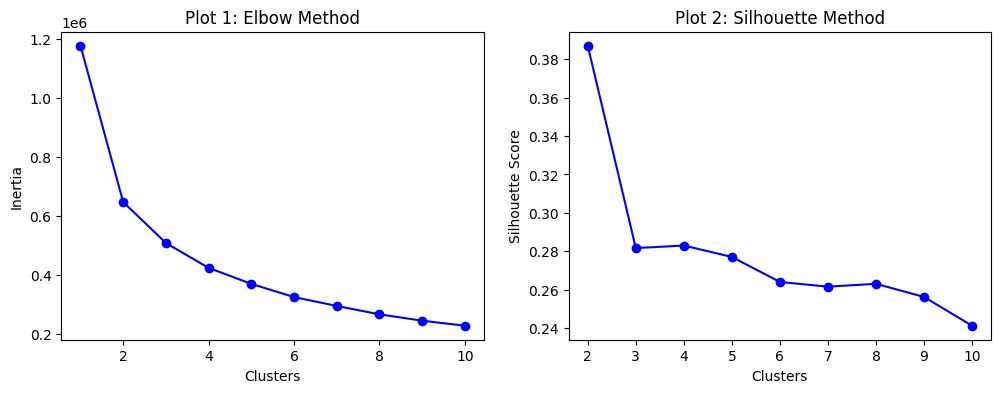

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(k_range, inertias, "bo-")
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Plot 1: Elbow Method')


if silhouette_scores:
  ax[1].plot(k_range[1:], silhouette_scores, 'bo-')
  ax[1].set_xlabel('Clusters')
  ax[1].set_ylabel('Silhouette Score')
  ax[1].set_title('Plot 2: Silhouette Method')

The optimal k is 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


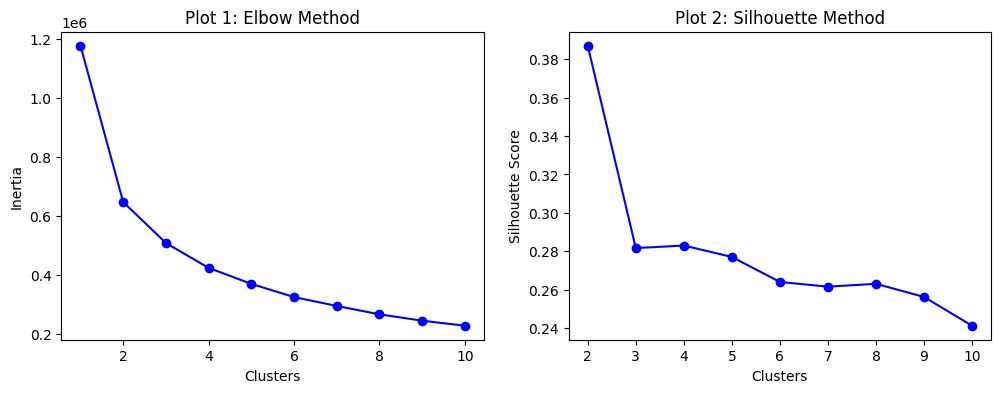

In [ ]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print("The optimal k is", optimal_k)

kmeans = KMeans(n_clusters = optimal_k)
kmeans.fit(cluster_data)

fig

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
A = pca.fit_transform(cluster_data)
evr = pca.explained_variance_ratio_

print("The explained variance ratio for the first 2 principal components is ", evr)

The explained variance ratio for the first 2 principal components is  [0.74496373 0.14944857]


In [ ]:
inertia = []
silhouette_scores = []

K_range = range(2,11)
for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(A)
  inertia.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(A, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

The optimal k is 2


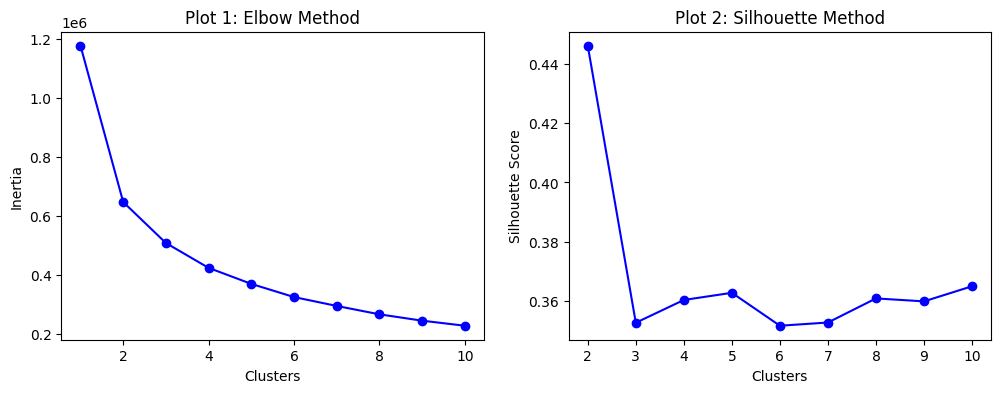

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(k_range, inertias, "bo-")
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Plot 1: Elbow Method')


if silhouette_scores:
  ax[1].plot(k_range[1:], silhouette_scores, 'bo-')
  ax[1].set_xlabel('Clusters')
  ax[1].set_ylabel('Silhouette Score')
  ax[1].set_title('Plot 2: Silhouette Method')

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print("The optimal k is", optimal_k)

                   0          1  accuracy  macro avg  weighted avg
precision   0.735294   0.843750  0.787879   0.789522      0.794452
recall      0.833333   0.750000  0.787879   0.791667      0.787879
f1-score    0.781250   0.794118  0.787879   0.787684      0.788269
support    30.000000  36.000000  0.787879  66.000000     66.000000


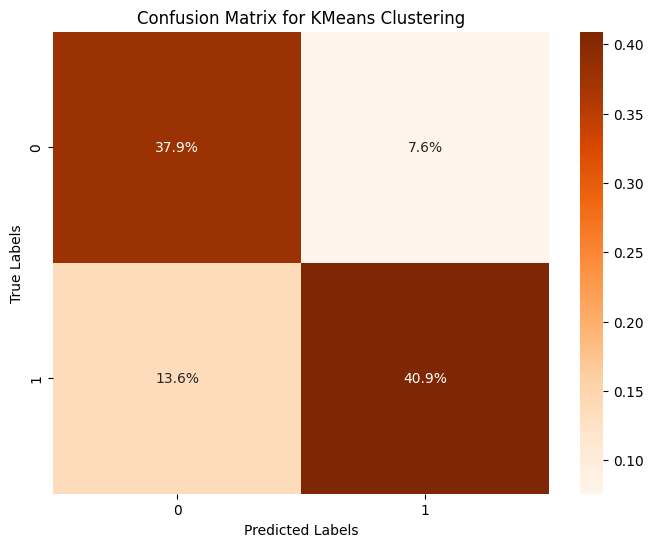

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
kmeans_accuracy=accuracy_score(y_test,y_pred)
kmeans_classreport=classification_report(y_test,y_pred,output_dict=True)

print(pd.DataFrame(kmeans_classreport))
kmeans_cm=confusion_matrix(y_test,y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(kmeans_cm / np.sum(kmeans_cm), annot=True, fmt='.1%', cmap='Oranges')
plt.title('Confusion Matrix for KMeans Clustering')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#*Decision Tree*

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz



tree_model= DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train)

#--predict on testing data
y_pred_tree = tree_model.predict(X_test)

#--checking accuracy
accuracy = accuracy_score(y_test, y_pred_tree)


                   0          1  accuracy  macro avg  weighted avg
precision   0.791667   0.738095  0.757576   0.764881      0.762446
recall      0.633333   0.861111  0.757576   0.747222      0.757576
f1-score    0.703704   0.794872  0.757576   0.749288      0.753432
support    30.000000  36.000000  0.757576  66.000000     66.000000


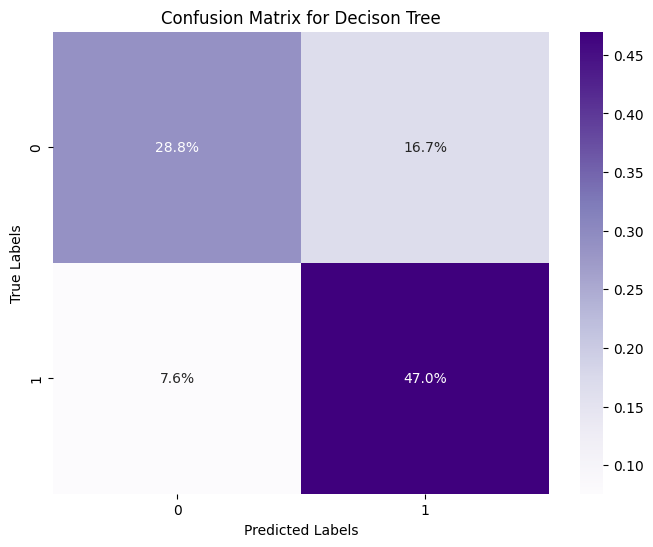

Cross-validation scores: [0.74074074 0.62962963 0.61538462 0.73076923 0.80769231 0.61538462
 0.84615385 0.88461538 0.73076923 0.88461538]
The Average Cross Val Score:0.75


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
dt_accuracy=accuracy_score(y_test,y_pred_tree)
dt_classreport=classification_report(y_test,y_pred_tree,output_dict=True)

print(pd.DataFrame(dt_classreport))
dt_cm=confusion_matrix(y_test,y_pred_tree)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm / np.sum(dt_cm), annot=True, fmt='.1%', cmap='Purples')
plt.title('Confusion Matrix for Decison Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

cv_tree=cross_val_score(tree_model,X_train,y_train,cv=10)
print("Cross-validation scores:",cv_tree)
print("The Average Cross Val Score:{:.2f}".format(cv_tree.mean()))


AttributeError: ignored

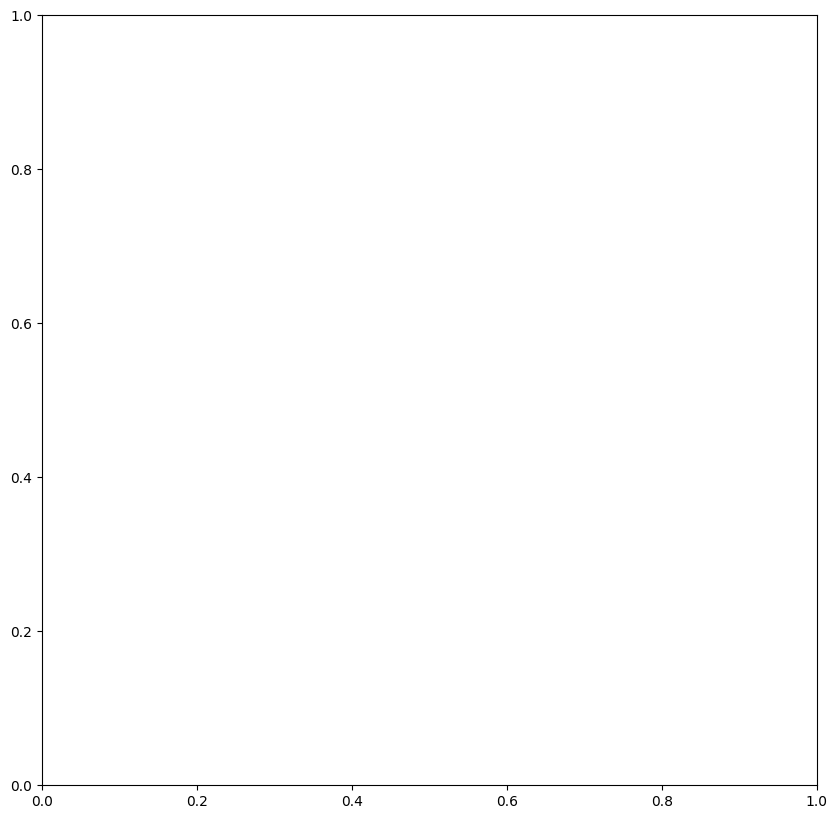

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(tree_model, feature_names=tree_model.feature_names, class_names=tree_model.target_names, filled=True, ax=ax)
plt.show()